# Econometrics Problem Set 2

### In this problem set we are going to look at the realtionship between a number of the characteristics of basketball players and their wages. Firstly i am going to import all the different libraries that I need. In addition to the ones that i imported in problem set 1 i am also importing seaborn which is a great data visualisation library.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

### Next is to load the data in to a dataframe using pandas and take a look at the data that we have in a tbaular form.

In [3]:
file_path = r"C:\Users\tomdo\Desktop\Stats\econometrics\Econometrics_Problem Set 2\Econometrics_Problem-Set-2\nbasal.xls"
df = pd.read_excel(file_path)
df.head()

,ID,marr,wage,exper,age,coll,games,minutes,guard,forward,...,assists,draft,allstar,avgmin,lwage,black,children,expersq,agesq,marrblck
0,1,1,1002.5,4,27,4,77,2867,1,0,...,5,19.0,0,37.23,6.91,1,0,16,729,1
1,2,1,2030.0,5,28,4,78,2789,1,0,...,9,28.0,0,35.76,7.62,1,1,25,784,1
2,3,0,650.0,1,25,4,74,1149,0,0,...,0,19.0,0,15.53,6.48,1,0,1,625,0
3,4,0,2030.0,5,28,4,47,1178,0,1,...,2,1.0,0,25.06,7.62,1,0,25,784,0
4,5,0,755.0,3,24,4,82,2096,1,0,...,3,24.0,0,25.56,6.63,1,0,9,576,0


### Now its time to do a bit of data exploration. I start of by looking at the descriptive stats (in particular the correlation matrix which quickly allow you to test which of the variables are correclated with each other) and by visualising it using box plots, scatter plots and a chart for the correlation matrix.

In [4]:
df.describe()

,ID,marr,wage,exper,age,coll,games,minutes,guard,forward,...,assists,draft,allstar,avgmin,lwage,black,children,expersq,agesq,marrblck
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,240.00000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.00000
mean,135.000000,0.442379,1423.827509,5.118959,27.394052,3.717472,65.724907,1682.193309,0.420074,0.408922,...,2.453532,20.20000,0.115242,23.979257,6.952379,0.806691,0.345725,37.721190,761.892193,0.33829
std,77.797815,0.497595,999.774074,3.400062,3.391292,0.754410,18.851110,893.327771,0.494491,0.492551,...,2.148124,18.73582,0.319909,9.731086,0.881428,0.395629,0.476491,46.537021,195.149406,0.47401
min,1.000000,0.000000,150.000000,1.000000,21.000000,0.000000,3.000000,33.000000,0.000000,0.000000,...,0.000000,1.00000,0.000000,2.890000,5.010000,0.000000,0.000000,1.000000,441.000000,0.00000
25%,68.000000,0.000000,650.000000,2.000000,25.000000,4.000000,57.000000,983.000000,0.000000,0.000000,...,1.000000,7.00000,0.000000,16.730000,6.480000,1.000000,0.000000,4.000000,625.000000,0.00000
50%,135.000000,0.000000,1186.000000,4.000000,27.000000,4.000000,74.000000,1690.000000,0.000000,0.000000,...,2.000000,14.50000,0.000000,24.820000,7.080000,1.000000,0.000000,16.000000,729.000000,0.00000
75%,202.000000,1.000000,2014.500000,7.000000,30.000000,4.000000,79.000000,2438.000000,1.000000,1.000000,...,3.000000,28.25000,0.000000,33.260000,7.610000,1.000000,1.000000,49.000000,900.000000,1.00000
max,269.000000,1.000000,5740.000000,18.000000,41.000000,4.000000,82.000000,3533.000000,1.000000,1.000000,...,13.000000,139.00000,1.000000,43.090000,8.660000,1.000000,1.000000,324.000000,1681.000000,1.00000


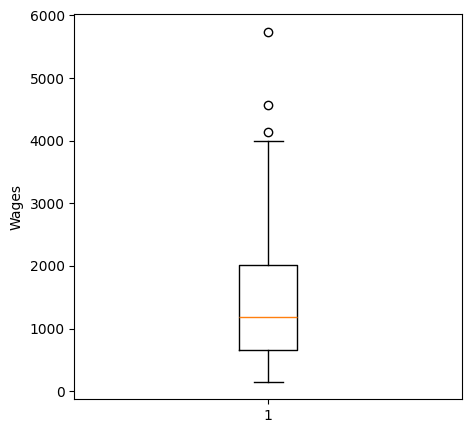

In [5]:
plt.figure(figsize=(5,5)) 
data = df["wage"]
plt.boxplot(data)
plt.ylabel("Wages")
plt.show()

In [6]:
corr_matrix = df.corr()
print(corr_matrix)

                ID      marr      wage     exper       age      coll  \
ID        1.000000  0.059375  0.015450  0.081858  0.087600  0.028609   
marr      0.059375  1.000000  0.158117  0.328272  0.367295 -0.043529   
wage      0.015450  0.158117  1.000000  0.409176  0.342444 -0.105632   
exper     0.081858  0.328272  0.409176  1.000000  0.941165  0.087341   
age       0.087600  0.367295  0.342444  0.941165  1.000000  0.074305   
coll      0.028609 -0.043529 -0.105632  0.087341  0.074305  1.000000   
games    -0.028050  0.069110  0.303766  0.148206  0.126373 -0.014931   
minutes  -0.004794  0.105087  0.563374  0.214265  0.147060 -0.068114   
guard    -0.065082  0.030498 -0.124664 -0.052026 -0.065701  0.069272   
forward   0.078192 -0.025298  0.051110 -0.000191  0.005929 -0.049425   
center   -0.016784 -0.006947  0.096684  0.068450  0.078386 -0.026273   
points   -0.033796  0.123694  0.657027  0.190789  0.104821 -0.120423   
rebounds -0.007444 -0.033022  0.540872  0.163501  0.116512 -0.11

### Now that is a biig correlation matrix which is quite difficult to read. So i the next few cells i have looked to see if i can make it a bit more readable. Firstly i do a nested for loop to iterate through each column of the correlation matrix and then if the correlation is greater than a certain amount i print out the variable names and the correlation of it.

In [7]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [27]:
threshold = 0.35
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        correlation_value = corr_matrix.iloc[i, j]
        
        if abs(correlation_value) > threshold:
            print(f"Columns '{corr_matrix.columns[i]}' and '{corr_matrix.columns[j]}' have a correlation of {correlation_value}")


Columns 'marr' and 'age' have a correlation of 0.36729457848626224
Columns 'marr' and 'agesq' have a correlation of 0.3573913682191796
Columns 'marr' and 'marrblck' have a correlation of 0.8027546757251224
Columns 'wage' and 'exper' have a correlation of 0.4091764023483812
Columns 'wage' and 'minutes' have a correlation of 0.5633736813209487
Columns 'wage' and 'points' have a correlation of 0.6570265226341696
Columns 'wage' and 'rebounds' have a correlation of 0.540871514054682
Columns 'wage' and 'draft' have a correlation of -0.36253089676220024
Columns 'wage' and 'allstar' have a correlation of 0.3973330947682341
Columns 'wage' and 'avgmin' have a correlation of 0.6217885393400762
Columns 'wage' and 'lwage' have a correlation of 0.8938394249339148
Columns 'exper' and 'age' have a correlation of 0.941165244761515
Columns 'exper' and 'lwage' have a correlation of 0.40562163101967924
Columns 'exper' and 'expersq' have a correlation of 0.9503272713234403
Columns 'exper' and 'agesq' have 

### Having found that quite difficult to follow too i did some googling and found seaborn does a good visual of the correlation matrix so below i produce that and that allows me to see there are some strong correlations between variables such as age and experience and points and mins. In particular for our analysis on wages variables like points, experience and minuites are correlated with the wage.

<Axes: >

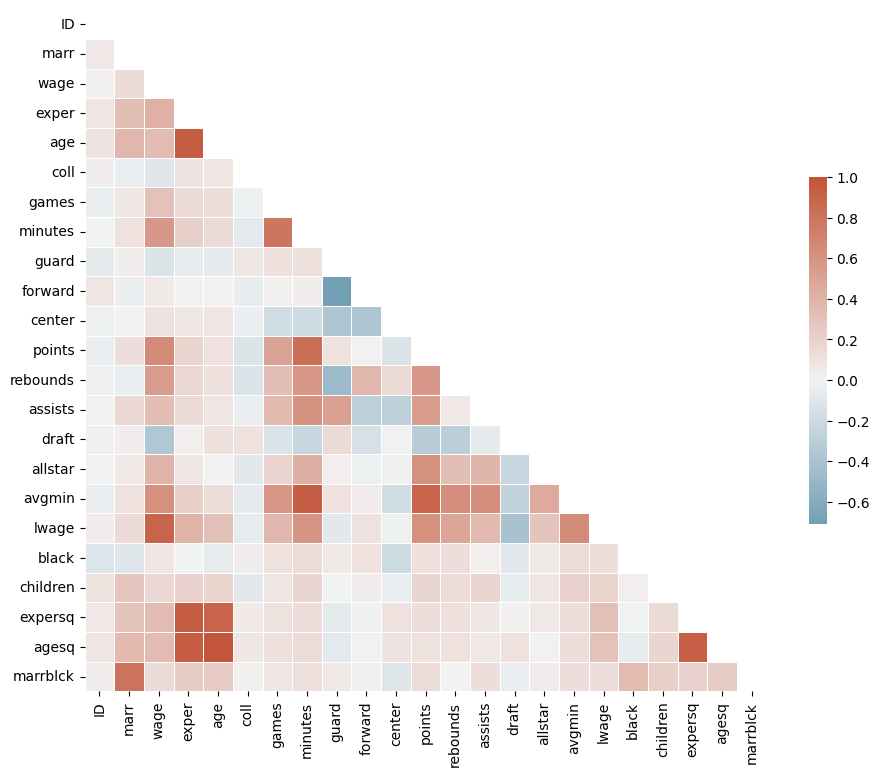

In [9]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: xlabel='exper', ylabel='wage'>

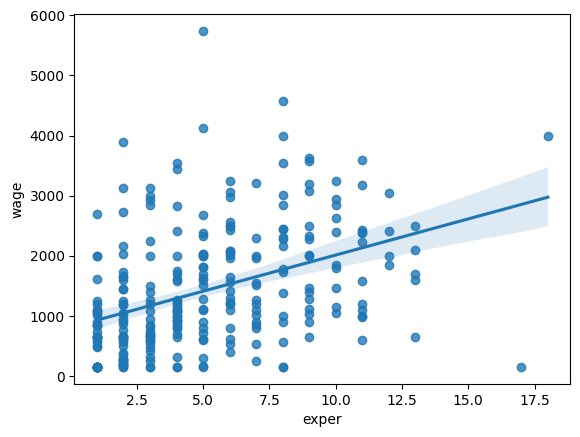

In [10]:
sns.regplot(x=df["exper"],y=df["wage"],data=df)

### Now were going to have a look at some simple bi variate regression models and interpret their results. First we look at the effect of experience on wages.

In [11]:
x, y = df["exper"], df["wage"]

In [12]:
x = sm.add_constant(x)

In [13]:
model = sm.OLS(y, x)

In [14]:
results = model.fit()

In [15]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     53.69
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           2.79e-12
Time:                        12:58:16   Log-Likelihood:                -2214.7
No. Observations:                 269   AIC:                             4433.
Df Residuals:                     267   BIC:                             4441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        807.9317    100.847      8.011      0.0

### Here we can see that an extra year of experience will increase the wage by 120. However there are likely to be a number of other variables that also have an impact on wages. Similarly to experience is age. Lets see how that impacts on wages.

In [16]:
x, y = df["age"], df["wage"]

In [17]:
x = sm.add_constant(x)

In [18]:
model = sm.OLS(y, x)

In [19]:
results = model.fit()

In [20]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     35.47
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           8.14e-09
Time:                        12:59:39   Log-Likelihood:                -2222.5
No. Observations:                 269   AIC:                             4449.
Df Residuals:                     267   BIC:                             4456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1341.7284    467.888     -2.868      0.0

In [26]:
intercept = results.params[0]
coeef = results.params[1]

age = 90

exp_wage = intercept + (coeef*age)
exp_wage

C:\Users\tomdo\AppData\Local\Temp\ipykernel_4188\3534265507.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = results.params[0]
C:\Users\tomdo\AppData\Local\Temp\ipykernel_4188\3534265507.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coeef = results.params[1]


7744.186724117136

### Above i have used the regression results to try and estimate what the wage of someone who is 90 would be. The results are nreally 8000. Obviously that is nonsense and demonstrates the risks of making predictions about data outside of the sample range. Lets see what the results are when we include both age and experience as independant variables.

In [28]:
x, y = df[["age","exper"]], df["wage"]

In [29]:
x = sm.add_constant(x)

In [37]:
model = sm.OLS(y, x)

In [38]:
results = model.fit()

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     29.86
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           2.00e-12
Time:                        18:02:00   Log-Likelihood:                -2212.1
No. Observations:                 269   AIC:                             4430.
Df Residuals:                     266   BIC:                             4441.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3295.2932   1096.404      3.006      0.003    1136.559    5454.028
age         -110.1153     48.335     -2.278      0.024    -205.284     -14.947
exper        223.6860     48.210      4.640      0.000     128.763     318.609
==============================================================================
Omnibus:                       57.784   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.329
Skew:                           1.077   Prob(JB):                     2.02e-26
Kurtosis:                       5.433   Cond. No.                         559.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""